In [ ]:
# Import necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/Dataset_ML'
img_height, img_width = 64, 64



In [ ]:
# Prepare image data and labels
images = []
labels = []


In [ ]:
for label in os.listdir(data_dir):
    shot_dir = os.path.join(data_dir, label)
    if os.path.isdir(shot_dir):
        for img_name in os.listdir(shot_dir):
            img_path = os.path.join(shot_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_height, img_width))
            img = img / 255.0
            images.append(img)
            labels.append(label)

In [ ]:
images = np.array(images)
labels = np.array(labels)

X = images.reshape(images.shape[0], -1)
y = labels

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  17.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  16.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  18.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  27.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  24.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  23.5s
[CV] END max_depth=10, min_s

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best cross-validation score:", grid_search.best_score_)


Best cross-validation score: 0.6998573759294452


In [ ]:
importances = grid_search.best_estimator_.feature_importances_
print("Feature Importances:", importances)


Feature Importances: [1.62682644e-04 8.53669110e-05 1.12571539e-04 ... 9.50508448e-05
 5.99939914e-05 1.12092080e-04]


In [ ]:
# Assuming you've used GridSearchCV for hyperparameter tuning and saved the result to `grid_search`
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Print the predictions
print("Predictions on the test set:")
print(y_pred)


Predictions on the test set:
[5 3 1 0 2 1 1 5 2 4 5 1 2 3 4 2 3 1 1 5 0 4 2 5 4 5 4 4 3 3 0 0 0 3 1 4 1
 3 3 4 5 3 5 2 5 1 3 3 4 5 2 2 2 0 4 4 3 2 4 0 4 2 2 2 5 0 1 2 5 4 2 1 5 2
 1 0 2 3 1 2 0 4 1 4 4 5 5 3 0 4 5 2 3 5 0 4 3 1 3 5 0 0 2 3 5 5 3 4 5 2 5
 1 4 4 3 5 3 4 4 4 5 0 1 4 3 3 3 4 3 3 0 5 2 0 4 5 1 3 1 5 5 5 5 5 3 3 2 0
 4 0 4 4 2 0 2 3 0 5 1 1 0 5 2 4 3 5 4 4 0 1 1 4 5 0 1 2 2 5 3 0 1 1 0 5 2
 3 3 1 0 3 1 1 3 3 0 4 5 0 0 5 5 0 4 3 4 2 1 0 5 2 0 5 5 5 4 5 3 5 5 0 3 3
 3 3 0 5 4 3 2 3 1 5 4 3 3 5 4 1 4 4 4 3 1 4 1 5 3 1 1 3 4 1 0 4 3 0 2 3 5
 5 3 4 2 2 5 2 5 0 3 1 0 3 2 0 2 1 3 1 5 1 5 2 5 4 1 4 1 0 0 2 3 2 0 4 2 2
 1 1 0 5 2 4 3 2 3 1 2 2 2 2 2 0 1 2 5 4 1 1 1 1 5 0 3 1 1 0 0 4 3 3 2 0 2
 5 1 2 2 1 4 3 1 5 1 0 5 5 5 2 1 4 0 5 4 3 5 2 2 4 5 1 2 1 4 5 3 0 0 0 5 2
 5 3 4 3 4 4 4 4 5 5 2 0 5 2 4 3 4 4 2 4 0 1 2 1 4 3 1 1 3 2 2 5 3 2 1 5 1
 2 0 1 2 5 5 0 1 2 5 2 5 3 2 3 2 5 3 0 0 3 1 4 4 1 4 4 2 3 3 5 2 4 2 1 1 1
 2 4 5 5 0 4 3 2 2 4 4 4 4 0 0 3 0 3 3 2 3 1 2 3 4 0 3 0 3 5 0 1 1 0 5 

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Improved Random Forest Accuracy: 0.7215363511659808

Classification Report:
                    precision    recall  f1-score   support

       0. Cut Shot       0.73      0.63      0.68       150
    1. Cover Drive       0.69      0.67      0.68       123
 2. Straight Drive       0.75      0.69      0.72       127
      3. Pull Shot       0.65      0.75      0.70       109
4. Leg Glance Shot       0.80      0.79      0.79       114
     5. Scoop Shot       0.72      0.83      0.77       106

          accuracy                           0.72       729
         macro avg       0.72      0.73      0.72       729
      weighted avg       0.72      0.72      0.72       729



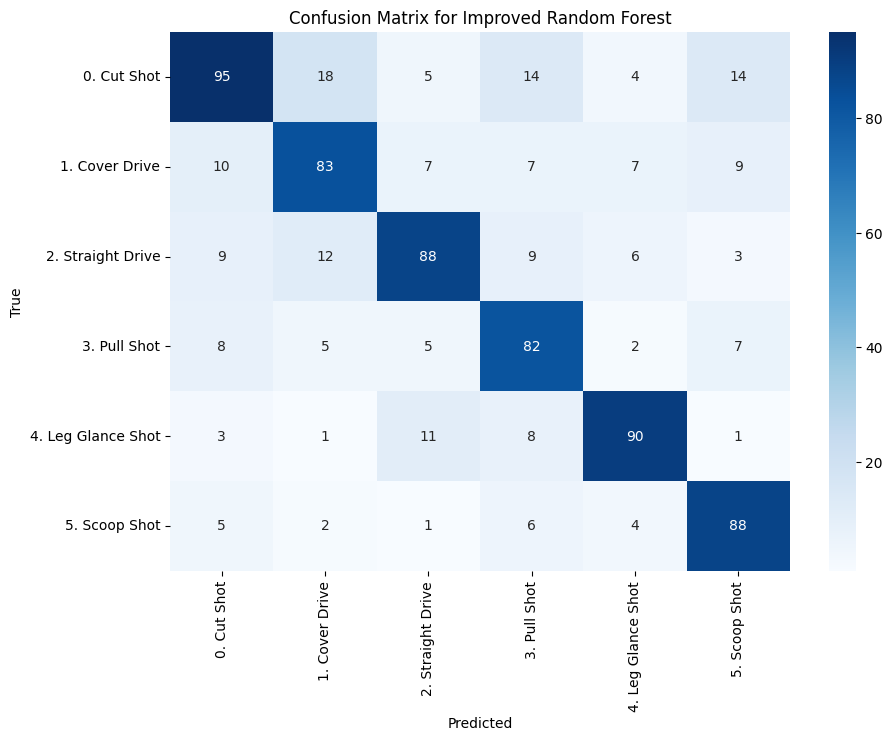

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Random Forest Accuracy: {accuracy}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Improved Random Forest')
plt.show()